# Task 1

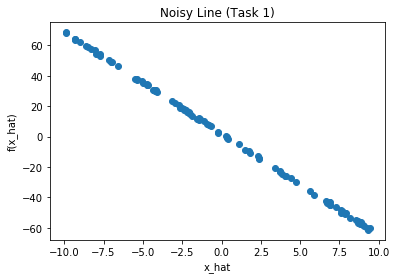

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.reset_default_graph()


slope = tf.constant(-6.7)
y_int = tf.constant(2.0)

x_hat_vec = tf.placeholder(tf.float32, None)
noise_vec = tf.placeholder(tf.float32, None)


with tf.name_scope("first_layer") as scope:
    x_hat_times_slope = x_hat_vec * slope
    triple_sum = x_hat_times_slope + y_int + noise_vec
    
    

x_hat_vec_in = np.random.uniform(-10, 10, 100)
noise_vec_in = np.random.uniform(-1, 1, 100)


 
init = tf.global_variables_initializer() 
sess = tf.Session()
sess.run( init )
writer = tf.summary.FileWriter("path_to_folder", sess.graph)


tf.summary.scalar('triple_sum', triple_sum)

result_vec = sess.run([triple_sum], feed_dict={x_hat_vec: x_hat_vec_in, noise_vec: noise_vec_in})
writer.close()

plt.scatter(x_hat_vec_in, result_vec)
txt = '''Noisy Line (Task 1)'''
plt.title(txt)
plt.xlabel("x_hat")
plt.ylabel("f(x_hat)")
plt.show()

# Task 2

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.reset_default_graph()


slope = tf.constant(-6.7)
y_int = tf.constant(2.0)

x_hat = tf.placeholder(tf.float32, None)
noise_hat = tf.placeholder(tf.float32, None)
target = tf.placeholder(tf.float32, None)


with tf.name_scope("noisy_line") as scope:
    x_hat_times_slope = x_hat * slope
    triple_sum = x_hat_times_slope + y_int + noise_hat

    

with tf.name_scope("regression") as scope:
    learning_rate = tf.constant(0.005)
    m = tf.Variable(0.1)
    b = tf.Variable(0.1)


 
init = tf.global_variables_initializer() 
sess = tf.Session()
sess.run( init )
writer = tf.summary.FileWriter("path_to_folder", sess.graph)


tf.summary.scalar('triple_sum', triple_sum)

for i in range(100):
    x_hat_in = np.random.uniform(-10, 10)
    noise_hat_in = np.random.uniform(-1, 1)
    target = sess.run([triple_sum], feed_dict={x_hat: x_hat_in, noise_hat: noise_hat_in})
    # print result # This seems to work so far
    
writer.close()



# Task 3